In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Amsterdam['review_scores_location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['review_scores_location'].max()
Min = Amsterdam['review_scores_location'].min()
Limites = [Min, Max]
Limites

[4.36, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

0.6399999999999997

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.044975483750632934

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (4.36, 5.0, 15)
intervalos

array([4.36      , 4.40571429, 4.45142857, 4.49714286, 4.54285714,
       4.58857143, 4.63428571, 4.68      , 4.72571429, 4.77142857,
       4.81714286, 4.86285714, 4.90857143, 4.95428571, 5.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Amsterdam['review_scores_location'] = pd.cut ( x = Amsterdam ['review_scores_location'], bins = intervalos, labels = categorias )
Amsterdam['review_scores_location']

0        Categoria5
1       Categoria10
2        Categoria7
3       Categoria14
4       Categoria11
           ...     
9654    Categoria10
9655    Categoria10
9656    Categoria14
9657    Categoria10
9658    Categoria10
Name: review_scores_location, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [12]:
table1 = freq_tbl(Amsterdam['review_scores_location'])
table1

,review_scores_location,frequency,percentage,cumulative_perc
0,Categoria14,3105,0.321462,0.321895
1,Categoria10,1975,0.204473,0.526643
2,Categoria13,773,0.080029,0.606780
3,Categoria11,745,0.077130,0.684014
4,Categoria12,642,0.066467,0.750570
5,Categoria9,565,0.058495,0.809144
6,Categoria7,466,0.048245,0.857454
7,Categoria8,341,0.035304,0.892805
8,Categoria4,326,0.033751,0.926602
9,Categoria6,275,0.028471,0.955111


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_location,frequency
0,Categoria14,3105
1,Categoria10,1975
2,Categoria13,773
3,Categoria11,745
4,Categoria12,642
5,Categoria9,565
6,Categoria7,466
7,Categoria8,341
8,Categoria4,326
9,Categoria6,275


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_location')
Filtro_index

,frequency
review_scores_location,
Categoria14,3105
Categoria10,1975
Categoria13,773
Categoria11,745
Categoria12,642
Categoria9,565
Categoria7,466
Categoria8,341
Categoria4,326


Text(0, 0.5, 'Frecuencia')

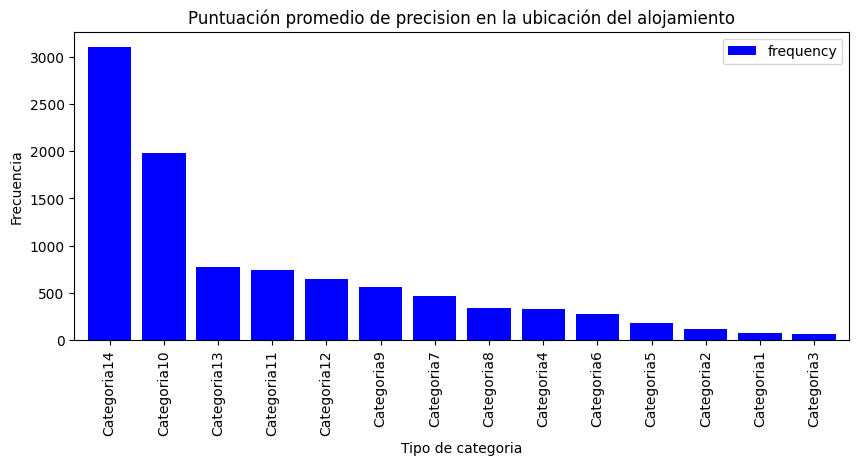

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de precision en la ubicación del alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')